<h1> Utrecht Summer School 'Introduction to Complex Systems' </h1>
<h2> Day 2. Project Cellular Automata </h2>

This Jupyter notebook contains the parameters that can be changed. It calls the function that will perform the simulation, computation and visualisation. Only this notebook needs to be amended.

<h3> Dependencies </h3>

The codes used in this project depend on complementary Python files. Specificially, the following packages need to be installed.
<h4> Packages needed </h4>
<ul>
    <li> numpy </li>
    <li> matplotlib </li>
    <li> IPython </li>
</ul>

<h1> Import the python codes </h1>

In [34]:
## DO NOT CHANGE THIS
%matplotlib inline

from CA_functions import CA_simulator

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib import animation
from matplotlib.animation import PillowWriter

from PIL import Image
from typing import Callable

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

C:\Users\guilh\AppData\Local\Temp\ipykernel_15556\411032274.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1> Parameters </h1>

In [35]:
# Parameters are packed into a class for easy passing of all parameter values to the simulator function

class Parameters:
    ## GENERAL PARAMETERS
    
    # domain size
    M = 50 # x-direction
    N = 50 # y-direction
    
    # initial conditions
    p = 0.5 # fraction of initial cells that are in the 1-state
    
    # scale-dependent activator-inhibitor parameters
    R_a = 5 #5 # activator radius
    R_i = 10 #10 # inhibitor radius
    w_a = 0.3 #0.3 # activator strength
    w_i = 0.1 #0.1 # inhibitor strength
    
# Finally, we create one instance of this class that now contains all parameters
par = Parameters

In [36]:
## Declaration of the CA evolution rule
def CA_evolution(i, j, A, N_a, N_i, w_a, w_i):
    # Input:
    # i: x-coordinate of the cell under consideration
    # j: y-coordinate of the cell under consideration
    # A: current state of the lattice
    # N_a: list of cells within activator range
    # N_i: list of cells within inhibitor range
    # w_a: strength of activator
    # w_i: strength of inhibitor
    
    # The total impact on the current strength is the amount of cells within activator range that are 
    # currently in the 1 state times the activator strength w_a, minus the amount of cells within inhibitor 
    # range that are currently in the 1 state times the inhibitor strength w_i.
    s = np.sum( A[N_a] * w_a ) - np.sum( A[N_i] * w_i)
    
    # If the total impact on the current cell is positive, it will be in the 1 state in the next time step;
    # otherwise, it will be in the 0 state
    aij_next = int(s > 0)
    return aij_next

<h1> Simulation Settings </h1>

In [37]:
# Simulation settings are packed into a class for easy passing of all settings to the simulator function

class SimSettings:        
    timesteps = 100 # how many timesteps
    plot_interval = 1 # Output a new figure every so many time steps
    
# Finally, we create one instance of this class that now contains all settings
sim_set = SimSettings

# Save the plot interval
dt = sim_set.plot_interval
frames = sim_set.timesteps // dt

<h1> Actual Simulation </h1>

In [38]:
# The function is given all parameters as input
# The output is a snapshots of some of the states of the system
Atotal = CA_simulator(par, sim_set, CA_evolution)

## Final Result

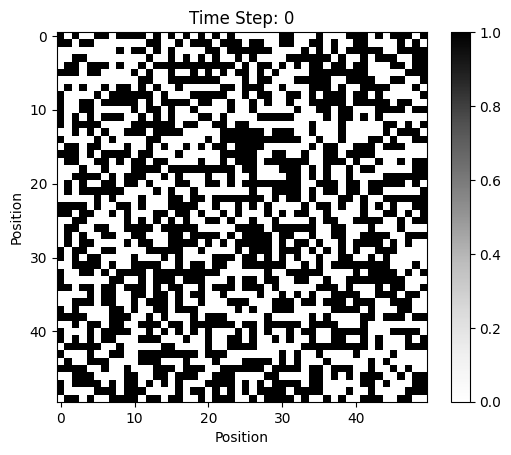

In [41]:
step = 0

plt.imshow(Atotal[step], cmap="Greys")
plt.colorbar()
plt.title(f"Time Step: {step}")
plt.xlabel('Position')
plt.ylabel('Position')
plt.show()

## Making Video

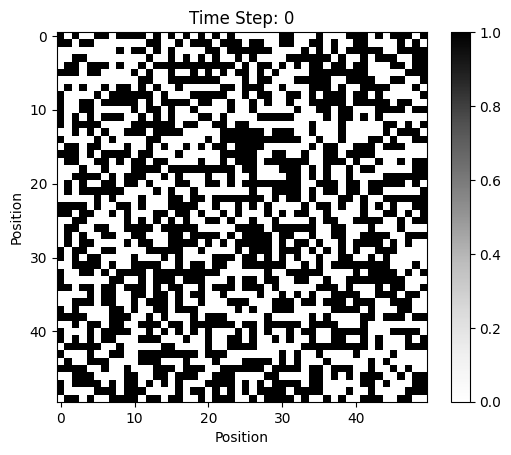

In [40]:
# Make into video
fig, ax = plt.subplots()
plt.title(f"Time Step: 0")
plt.xlabel('Position')
plt.ylabel('Position')

# First frame
im = ax.imshow(Atotal[0], cmap="Greys")
plt.colorbar(im)

# Update the frame
def update(frame):
    global dt

    # Timestep
    tempo = int(dt * frame)
    plt.title(f"Time Step: {tempo}")

    # Atualizar os dados na imagem
    im.set_array(Atotal[frame])
    return im

# Guardar o vídeo
ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
ani.save('cellular-start.gif', writer="pillow")